In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'D:\vipul\Github projects\data_science_projects\Kaggle\spaceship-titanic\train.csv')
test_data = pd.read_csv(r'D:\vipul\Github projects\data_science_projects\Kaggle\spaceship-titanic\test.csv')

In [3]:
train_data_orig = train_data.copy()

In [4]:
train_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
(train_data.isna().sum()/len(train_data))*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [6]:
train_data[(train_data.CryoSleep==1)&(train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().any(axis=1))]

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
7        0006_02      Earth      True     G/0/S    TRAPPIST-1e  28.0  False   
10       0008_02     Europa      True     B/1/P    TRAPPIST-1e  34.0  False   
23       0020_03      Earth      True     E/0/S    55 Cancri e  29.0  False   
25       0020_05      Earth      True     E/0/S  PSO J318.5-22   1.0  False   
28       0024_01     Europa      True     C/2/S    TRAPPIST-1e  62.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8600     9179_03      Earth      True  G/1494/P  PSO J318.5-22  18.0  False   
8607     9186_01       Mars      True  F/1878/P    TRAPPIST-1e   2.0  False   
8642     9221_01      Earth      True  G/1497/P    TRAPPIST-1e  21.0  False   
8643     9222_01       Mars      True  F/1784/S    TRAPPIST-1e  50.0  False   
8665     9247_01      Earth      True  G/1491/S    TRAPPIST-1e  33.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
7             0.0        0.0           0.0  0.0     NaN  Candra Jacostaffey   
10            0.0        0.0           NaN  0.0     0.0      Altardr Flatic   
23            0.0        0.0           NaN  0.0     0.0  Mollen Mcfaddennon   
25            NaN        0.0           0.0  0.0     0.0     Mael Brantuarez   
28            0.0        0.0           NaN  0.0     0.0     Penton Fullided   
...           ...        ...           ...  ...     ...                 ...   
8600          0.0        0.0           NaN  0.0     0.0    Darley Tranciams   
8607          0.0        0.0           NaN  0.0     0.0          Mass Homin   
8642          0.0        0.0           0.0  0.0     NaN      Elicey Beachez   
8643          0.0        0.0           0.0  NaN     0.0        Carves Chate   
8665          0.0        0.0           0.0  0.0     NaN         Phia Cleang   

      Transported  
7            True  
10           True  
23          False  
25          False  
28           True  
...           ...  
8600        False  
8607         True  
8642        False  
8643         True  
8665        False  

[347 rows x 14 columns]

In [7]:
# train_data_ch[train_data_ch.PassengerId.isin(['0006_02','0008_02','0020_03'])]

In [8]:
# train_data_ch['CryoSleep']==1

In [9]:
# train_data_ch = train_data.copy()
# train_data_ch.loc[train_data_ch['CryoSleep']==1,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0
# (train_data_ch.isna().sum()/len(train_data_ch))*100

In [7]:
train_data.sample(5)

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
7941     8479_01      Earth     False  F/1738/P    TRAPPIST-1e  27.0    NaN   
2160     2309_01      Earth      True   G/371/P  PSO J318.5-22   5.0  False   
4248     4516_01      Earth     False   F/848/S    55 Cancri e  37.0  False   
5534     5900_02       Mars      True  F/1220/P    TRAPPIST-1e  30.0  False   
7218     7711_01        NaN       NaN   D/241/P    TRAPPIST-1e  24.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
7941          0.0        0.0           0.0   716.0     0.0     Heremy Cardner   
2160          0.0        0.0           0.0     0.0     0.0  Feryla Whitledges   
4248        426.0        0.0           2.0   194.0   308.0   Marky Cleminglas   
5534          0.0        0.0           0.0     0.0     0.0       Fispot Nutca   
7218          0.0       82.0           0.0  1624.0    77.0  Jihoton Muspereed   

      Transported  
7941        False  
2160        False  
4248        False  
5534         True  
7218        False

In [8]:
train_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [9]:
train_data.describe(include='O')

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

In [10]:
num_vars = train_data.select_dtypes(include='number').columns.to_list()
cat_vars = train_data.select_dtypes(include='O').columns.to_list()

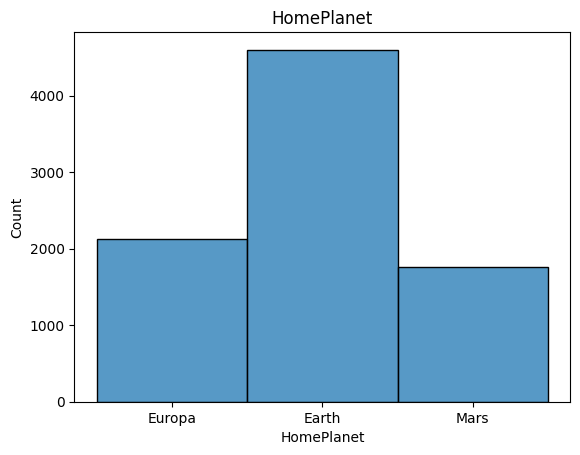

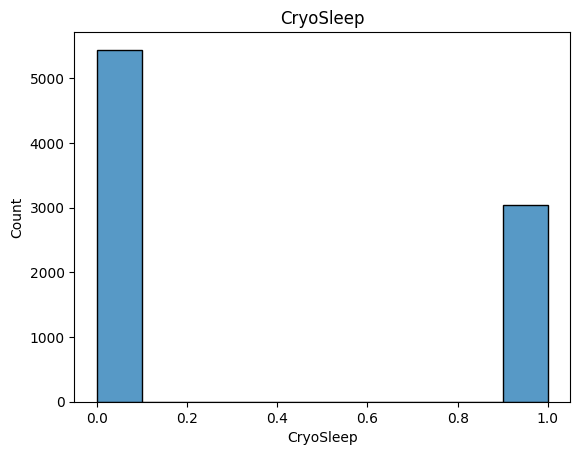

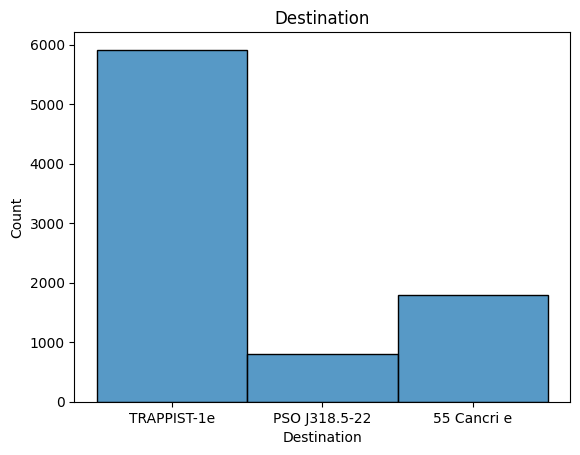

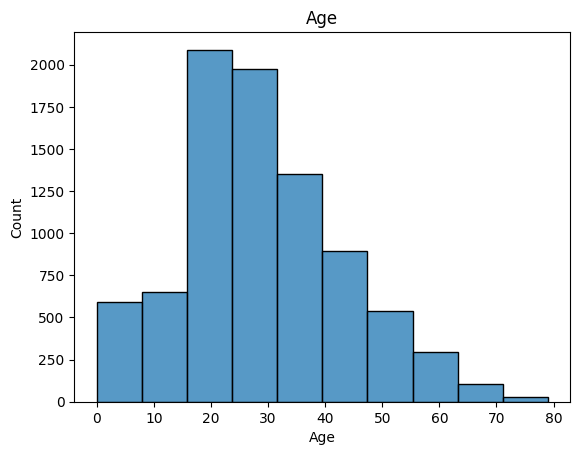

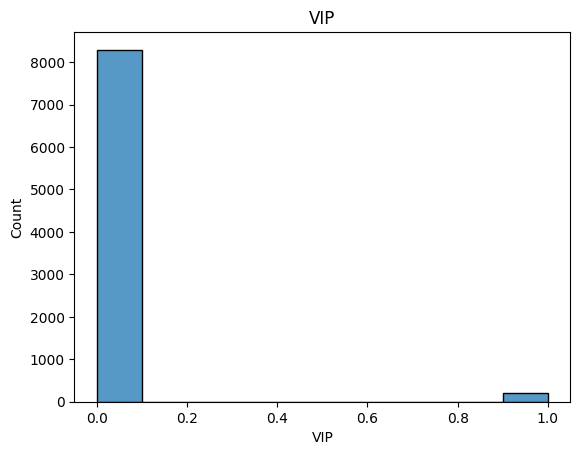

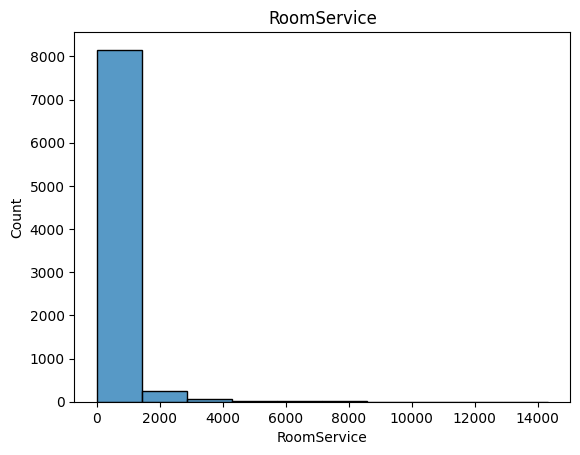

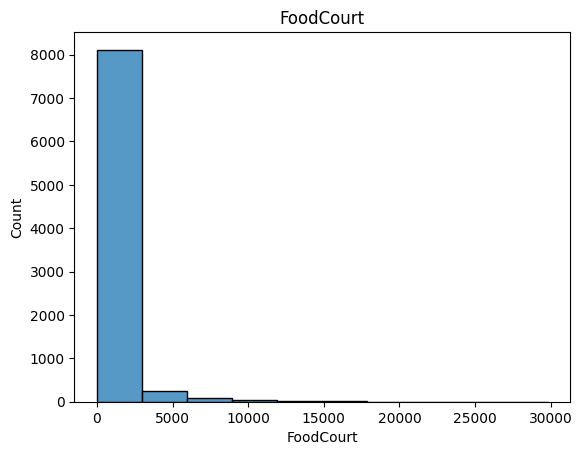

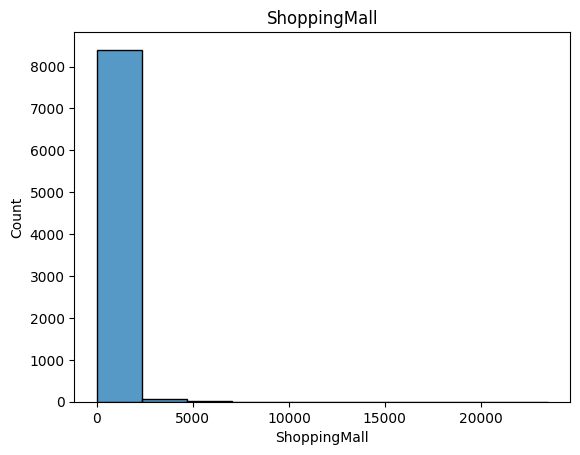

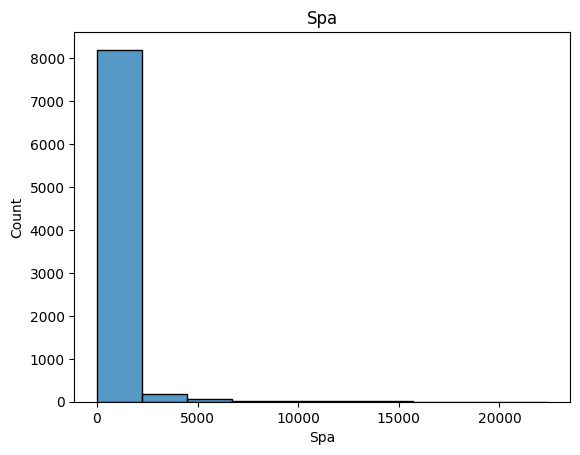

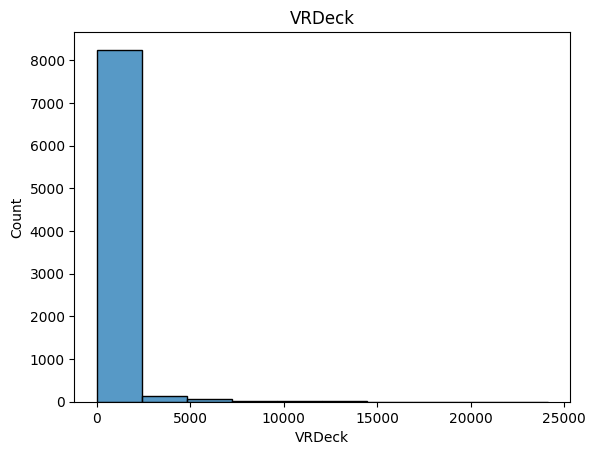

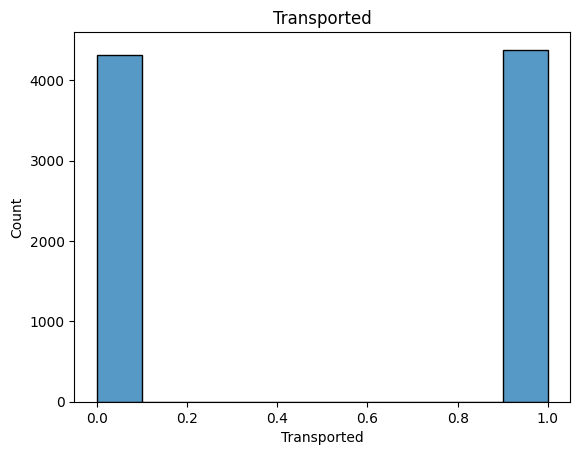

In [14]:
for i in train_data.columns:
    if i not in ('PassengerId','Cabin','Name'):
        sns.histplot(train_data[i],bins=10)
        plt.title(i)
        plt.show()

In [11]:
train_data.drop(columns=['Transported'])

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines  
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent  
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent  
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines  
...           ...        ...           ...     ...     ...                ...  
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther  
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley  
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon  
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre  
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre  

[8693 rows x 13 columns]

In [12]:
train_data['HomePlanet'] = train_data.HomePlanet.astype('category')

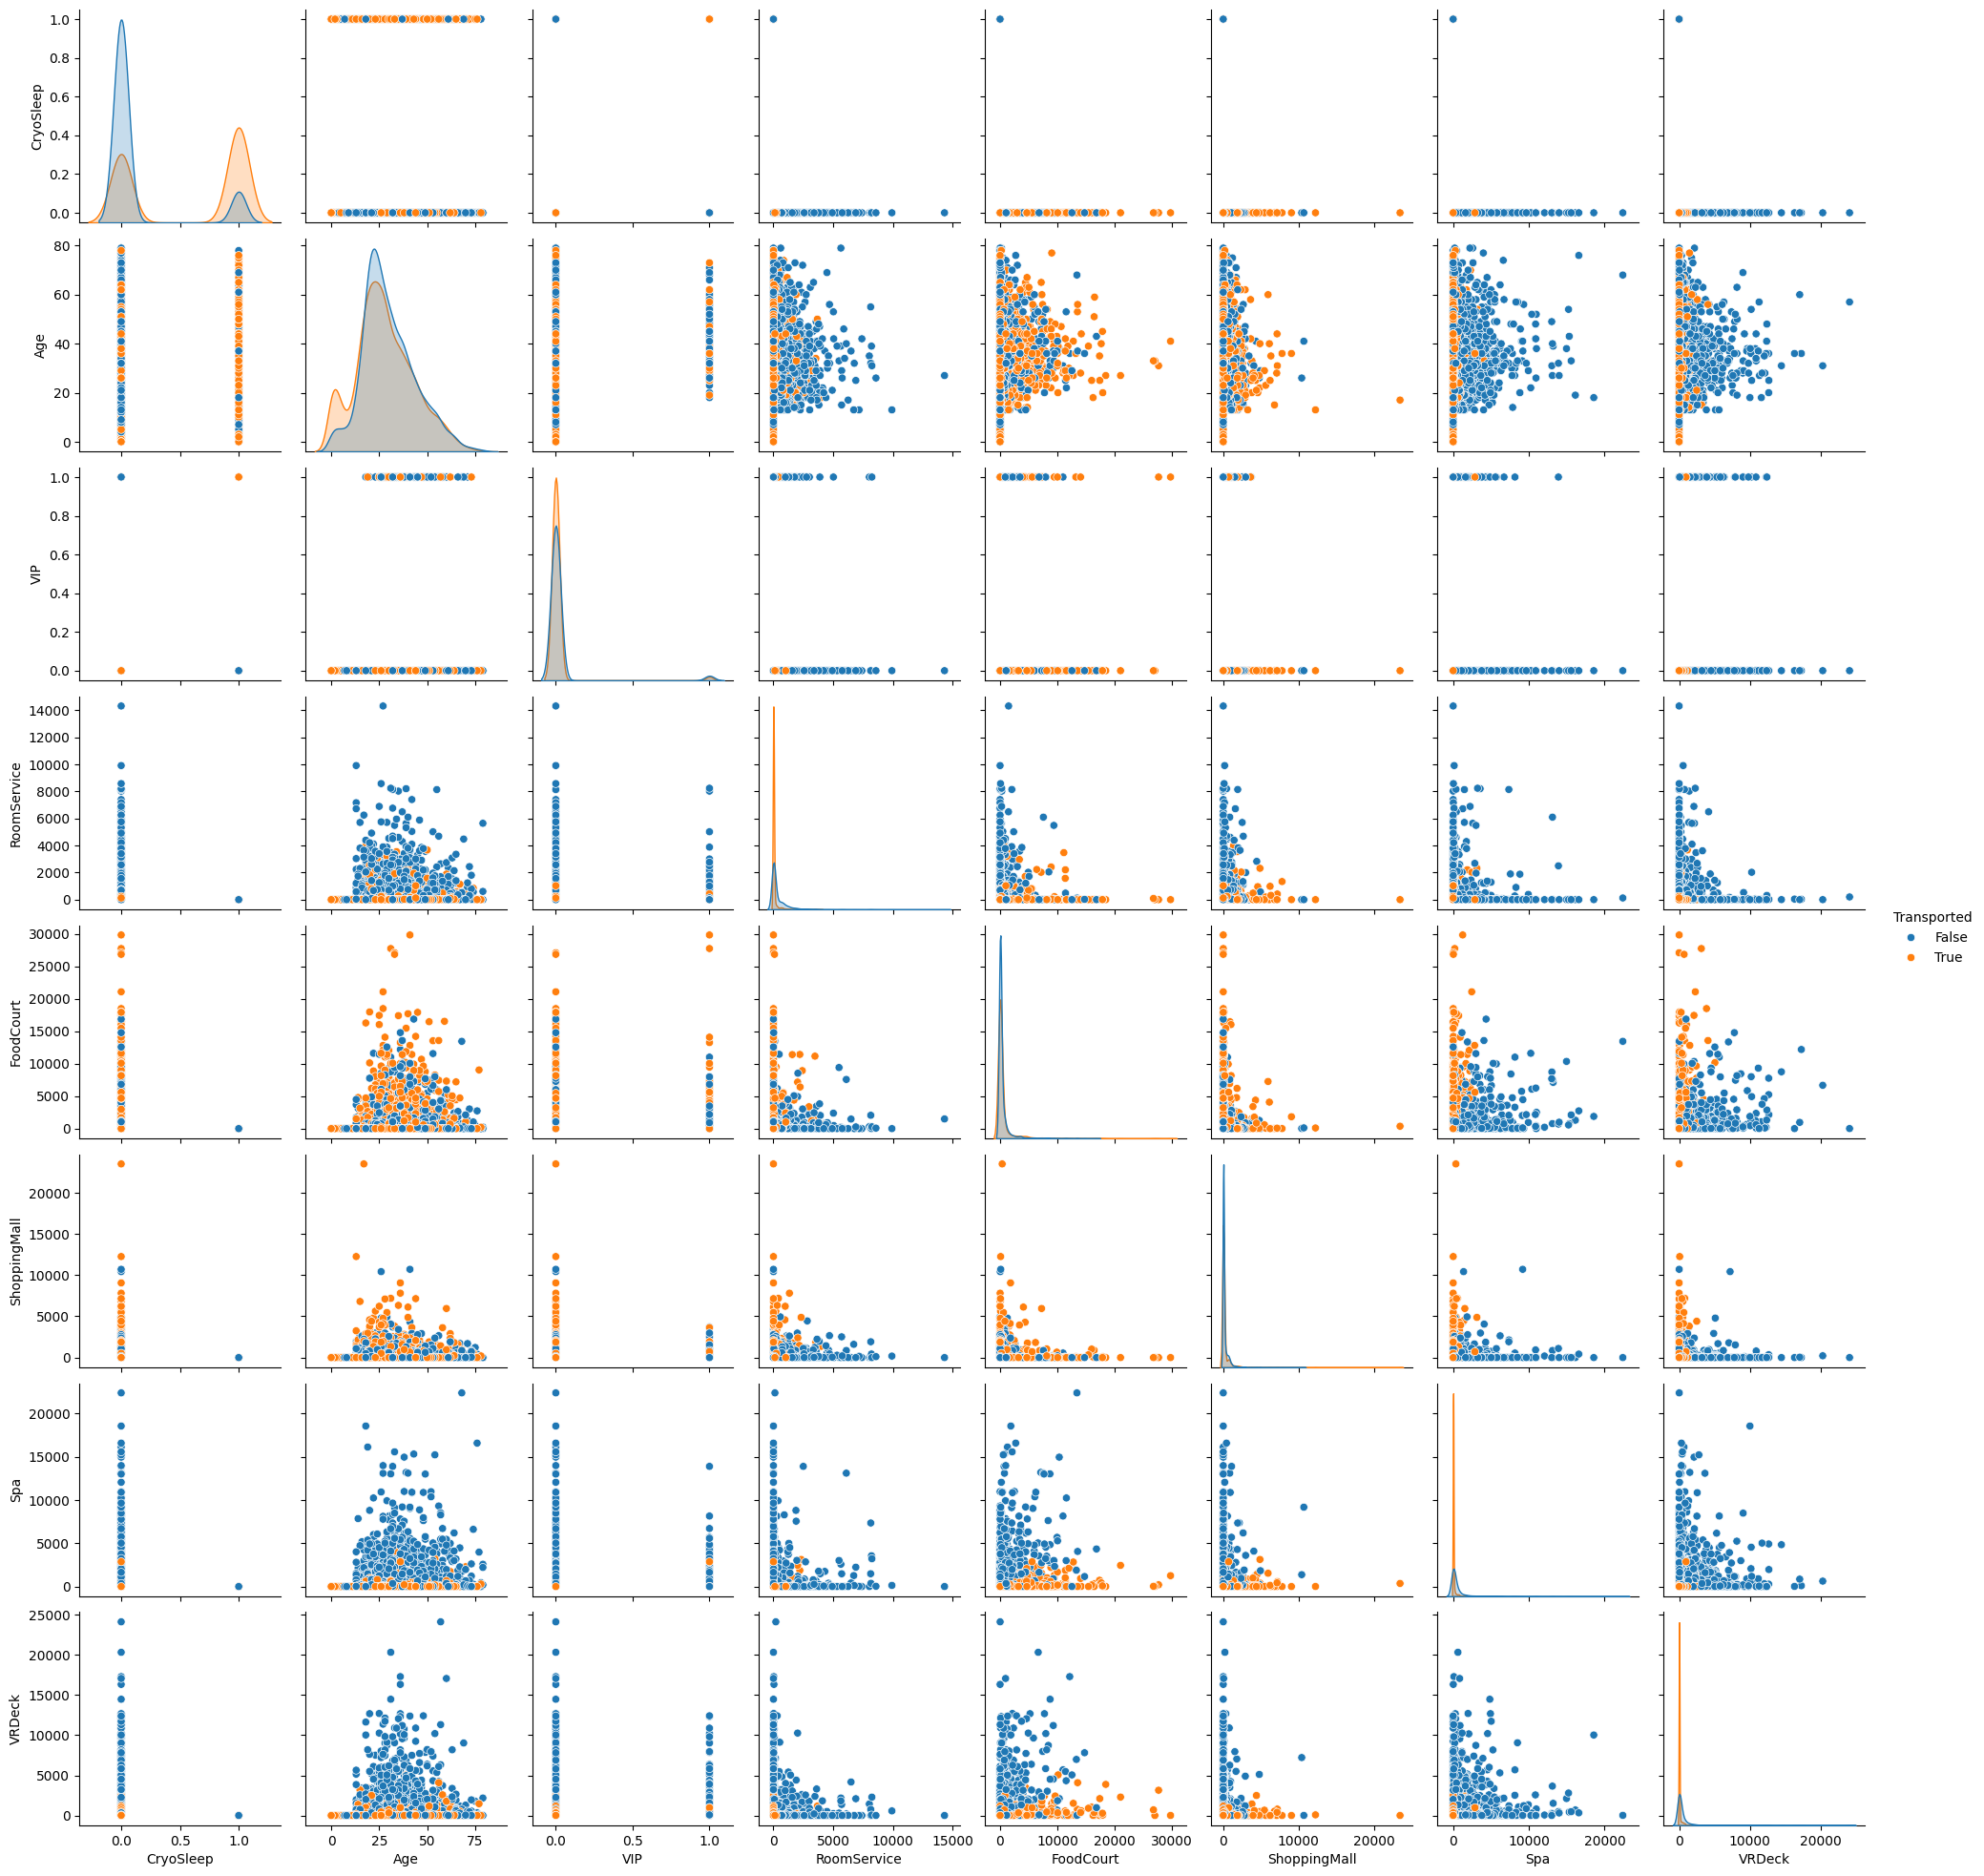

In [17]:
sns.pairplot(train_data,hue='Transported')
plt.show()

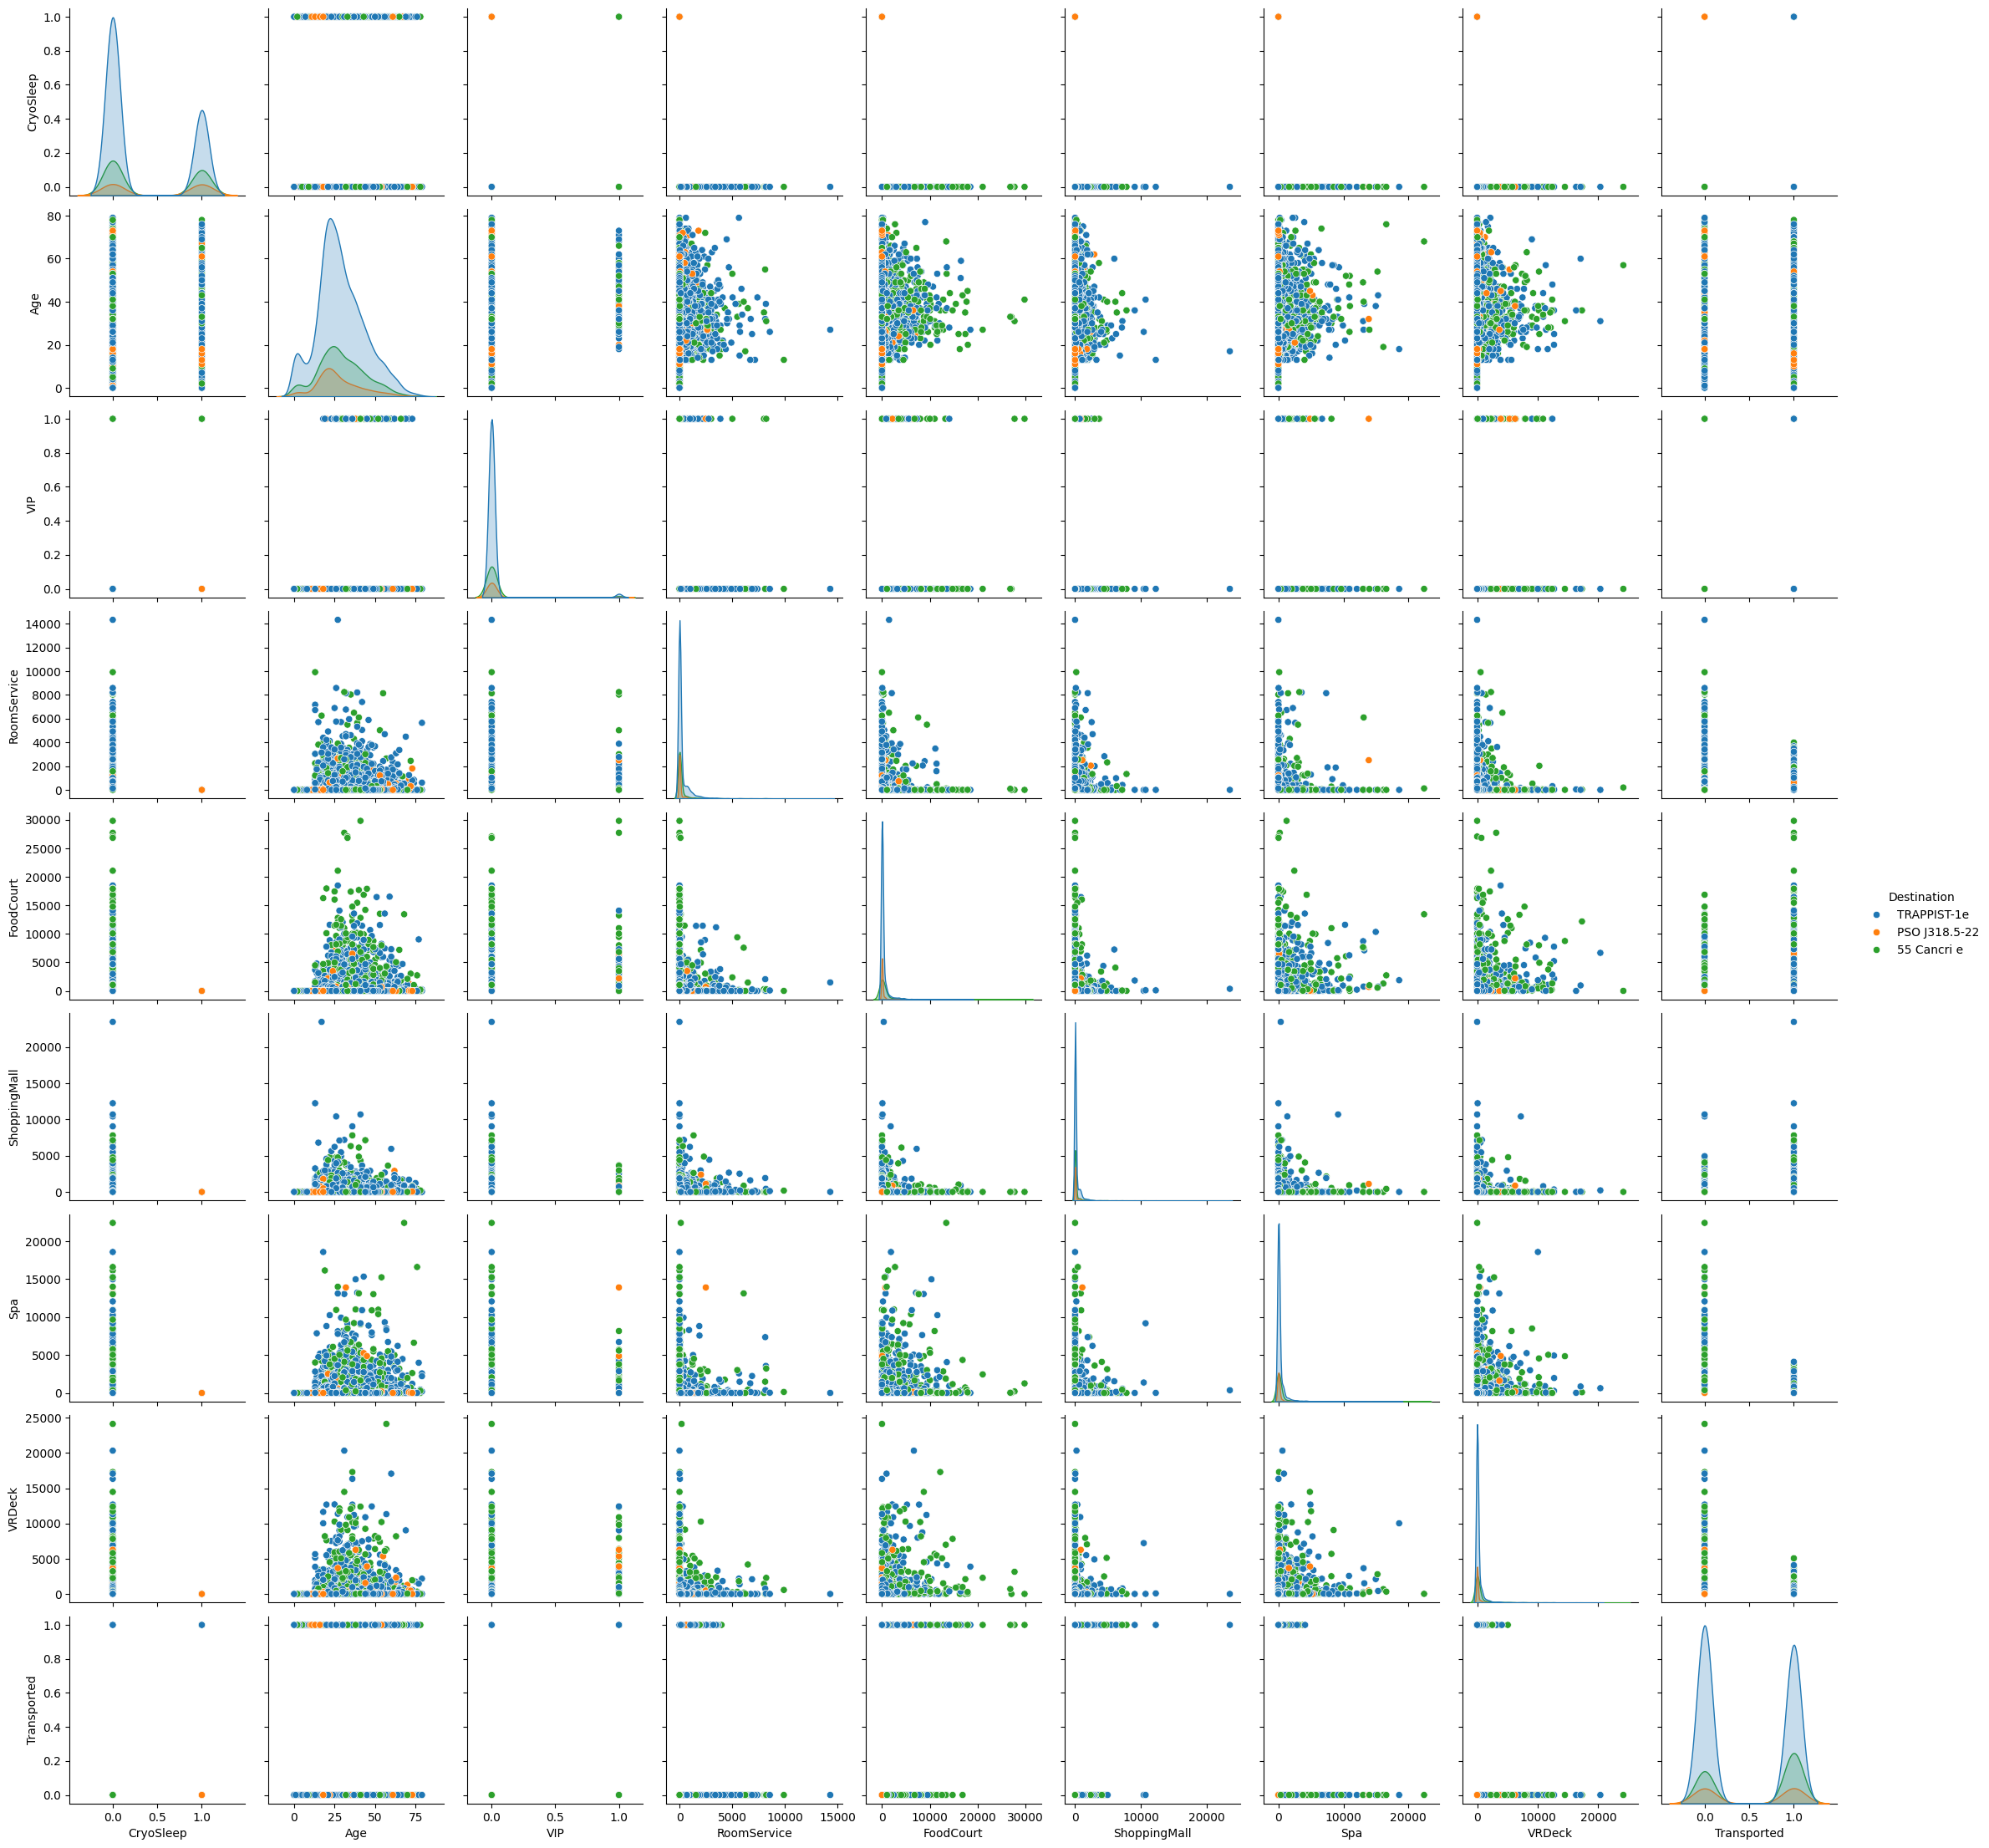

In [18]:
sns.pairplot(train_data,hue='Destination')
plt.show()

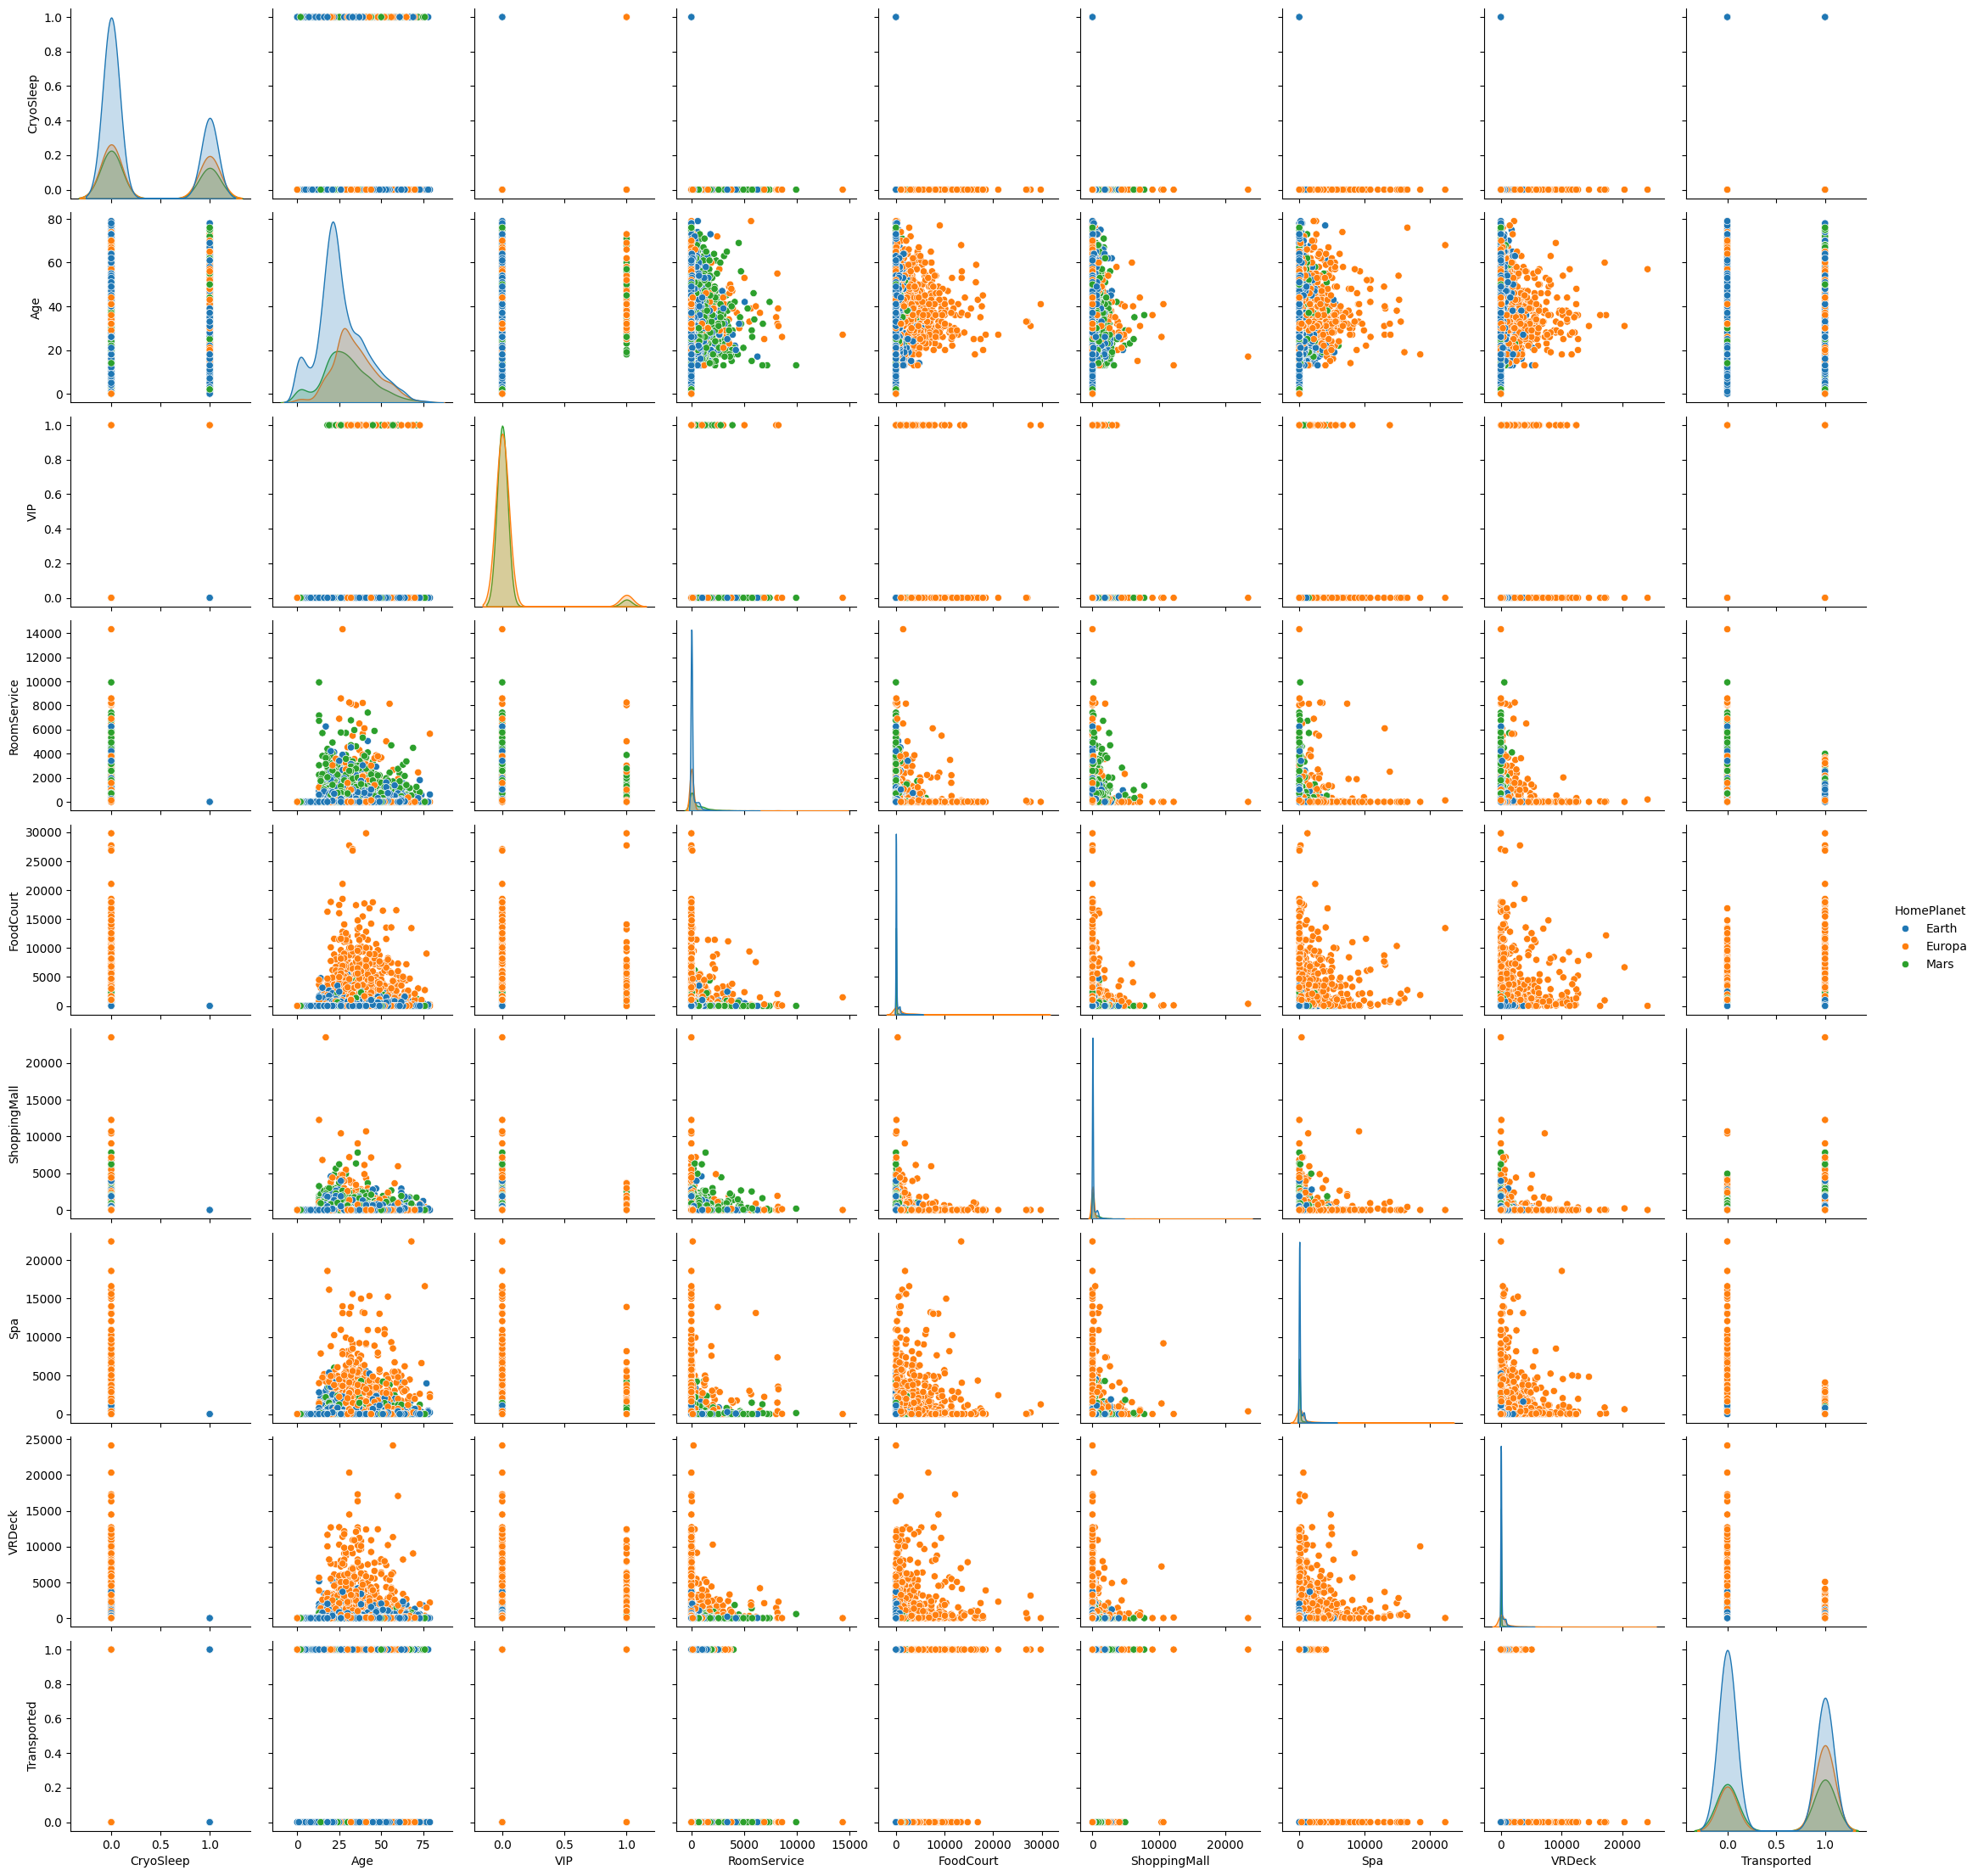

In [19]:
sns.pairplot(train_data,hue='HomePlanet')
plt.show()

In [13]:
train_data[['passenger_group','passenger_num']]=train_data['PassengerId'].apply(lambda x: pd.Series(x.split("_")))
train_data[['deck','num','side']]=train_data['Cabin'].apply(lambda x: pd.Series(x.split("/")) if pd.notnull(x) else pd.Series([np.nan,np.nan,np.nan]))
train_data['passenger_num']=train_data['passenger_num'].astype('int')


In [14]:
train_data['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [15]:
train_data[['First Name','Last Name']]=train_data.Name.apply(lambda x: pd.Series(x.split(' ')) if pd.notnull(x) else pd.Series([np.nan,np.nan]))

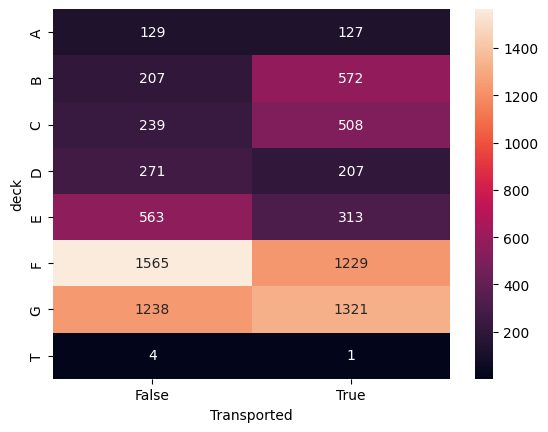

In [16]:
sns.heatmap(pd.crosstab(train_data['deck'],train_data['Transported']),annot=True,fmt='.0f')
plt.show()

In [17]:
def counting(X):
    return X.value_counts(dropna=False)
family_dict=train_data.groupby(['passenger_group'])['Last Name'].apply(counting).to_dict()
family_dict[('0022',np.nan)]

1

In [18]:
pass_count=train_data.groupby(['passenger_group'])['passenger_num'].agg(max).reset_index().rename(columns={'passenger_num':'total_passenger'})
train_data2 = pd.merge(train_data,pass_count,on='passenger_group',how='left')
train_data2['total_expense'] = train_data2.apply(lambda X: np.nansum([X['RoomService'],X['FoodCourt'],X['ShoppingMall'],X['Spa'],X['VRDeck']]),1)
train_data2['Last Name'] = train_data2['Last Name'].apply(lambda x: np.nan if pd.isnull(x) else x) 
train_data2['with_family'] = train_data2.apply(lambda X: ((pd.notnull(X['Last Name']))&(family_dict[(X.passenger_group,X['Last Name'])]>1))*1, 1)
train_data2.to_csv('check_family.csv',index=False)

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\2388276996.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pass_count=train_data.groupby(['passenger_group'])['passenger_num'].agg(max).reset_index().rename(columns={'passenger_num':'total_passenger'})


### checking people from same home planet are in same group

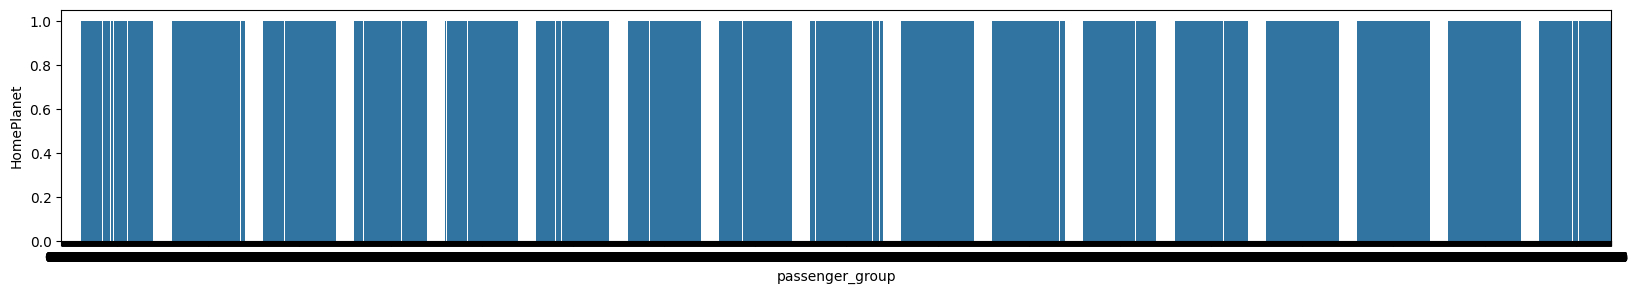

In [19]:
fig=plt.figure(figsize=(20,3))
sns.barplot(train_data2.groupby(['passenger_group'])['HomePlanet'].apply(pd.Series.nunique))
plt.show()

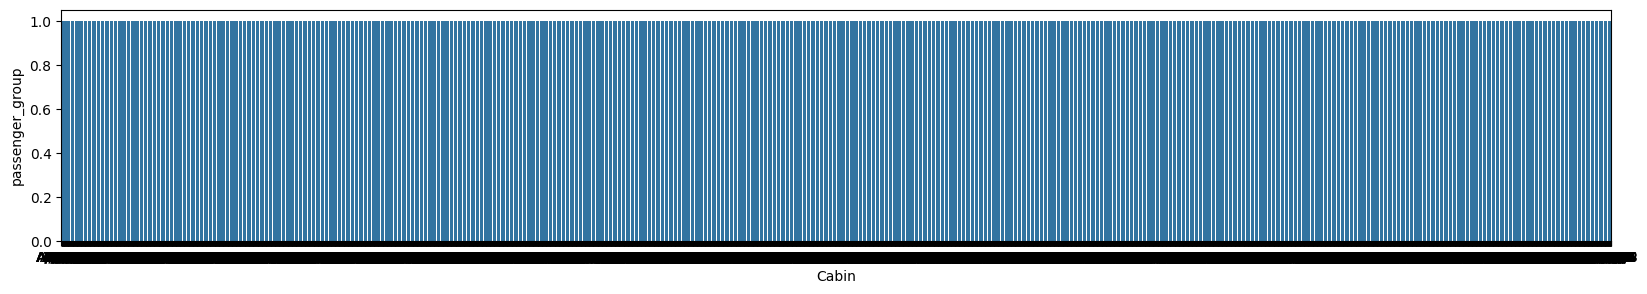

In [20]:
fig=plt.figure(figsize=(20,3))
sns.barplot(train_data2.groupby(['Cabin'])['passenger_group'].apply(pd.Series.nunique))
plt.show()

In [21]:
train_data2[train_data2['passenger_group']=='0244']

PassengerId HomePlanet CryoSleep   Cabin  Destination   Age    VIP  \
227     0244_01       Mars      True     NaN  TRAPPIST-1e  43.0  False   
228     0244_02       Mars      True  F/47/S  55 Cancri e  14.0    NaN   

     RoomService  FoodCourt  ShoppingMall  ...  passenger_group  \
227          0.0        0.0           0.0  ...             0244   
228          0.0        0.0           0.0  ...             0244   

     passenger_num deck  num side  First Name Last Name total_passenger  \
227              1  NaN  NaN  NaN       Froos       Sad               2   
228              2    F   47    S        Tous       Sad               2   

    total_expense with_family  
227           0.0           1  
228           0.0           1  

[2 rows x 24 columns]

In [22]:
def impute_cabin(X):

    return X

train_data2.groupby(['passenger_group']).apply(impute_cabin)

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\934824046.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data2.groupby(['passenger_group']).apply(impute_cabin)


PassengerId HomePlanet CryoSleep     Cabin  \
passenger_group                                                   
0001            0        0001_01     Europa     False     B/0/P   
0002            1        0002_01      Earth     False     F/0/S   
0003            2        0003_01     Europa     False     A/0/S   
                3        0003_02     Europa     False     A/0/S   
0004            4        0004_01      Earth     False     F/1/S   
...                          ...        ...       ...       ...   
9276            8688     9276_01     Europa     False    A/98/P   
9278            8689     9278_01      Earth      True  G/1499/S   
9279            8690     9279_01      Earth     False  G/1500/S   
9280            8691     9280_01     Europa     False   E/608/S   
                8692     9280_02     Europa     False   E/608/S   

                        Destination   Age    VIP  RoomService  FoodCourt  \
passenger_group                                                            
0001            0       TRAPPIST-1e  39.0  False          0.0        0.0   
0002            1       TRAPPIST-1e  24.0  False        109.0        9.0   
0003            2       TRAPPIST-1e  58.0   True         43.0     3576.0   
                3       TRAPPIST-1e  33.0  False          0.0     1283.0   
0004            4       TRAPPIST-1e  16.0  False        303.0       70.0   
...                             ...   ...    ...          ...        ...   
9276            8688    55 Cancri e  41.0   True          0.0     6819.0   
9278            8689  PSO J318.5-22  18.0  False          0.0        0.0   
9279            8690    TRAPPIST-1e  26.0  False          0.0        0.0   
9280            8691    55 Cancri e  32.0  False          0.0     1049.0   
                8692    TRAPPIST-1e  44.0  False        126.0     4688.0   

                      ShoppingMall  ...  passenger_group  passenger_num deck  \
passenger_group                     ...                                        
0001            0              0.0  ...             0001              1    B   
0002            1             25.0  ...             0002              1    F   
0003            2              0.0  ...             0003              1    A   
                3            371.0  ...             0003              2    A   
0004            4            151.0  ...             0004              1    F   
...                            ...  ...              ...            ...  ...   
9276            8688           0.0  ...             9276              1    A   
9278            8689           0.0  ...             9278              1    G   
9279            8690        1872.0  ...             9279              1    G   
9280            8691           0.0  ...             9280              1    E   
                8692           0.0  ...             9280              2    E   

                       num side  First Name    Last Name total_passenger  \
passenger_group                                                            
0001            0        0    P       Maham    Ofracculy               1   
0002            1        0    S      Juanna        Vines               1   
0003            2        0    S      Altark       Susent               2   
                3        0    S       Solam       Susent               2   
0004            4        1    S       Willy  Santantines               1   
...                    ...  ...         ...          ...             ...   
9276            8688    98    P     Gravior    Noxnuther               1   
9278            8689  1499    S       Kurta    Mondalley               1   
9279            8690  1500    S       Fayey       Connon               1   
9280            8691   608    S      Celeon    Hontichre               2   
                8692   608    S      Propsh    Hontichre               2   

                     total_expense with_family  
passenger_group                                 
0001            0              0

### This mean each cabin has members from1 group only

In [23]:
train_data2[train_data2.total_passenger>1].to_csv('check_family.csv')

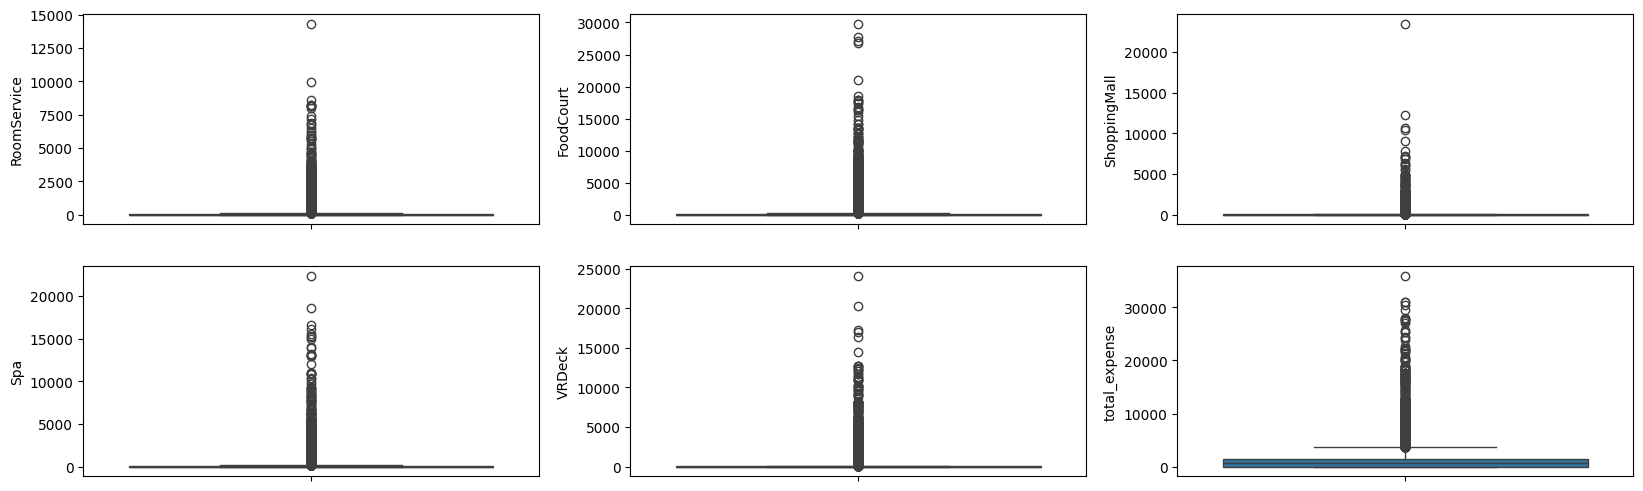

In [24]:
fig,axis = plt.subplots(2,3,figsize=(20,6))
axi={'RoomService':axis[0,0],'FoodCourt':axis[0,1],'ShoppingMall':axis[0,2],'Spa':axis[1,0],'VRDeck':axis[1,1],'total_expense':axis[1,2]}
for i in (['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','total_expense']):
    sns.boxplot(y=train_data2[i],ax=axi[i])

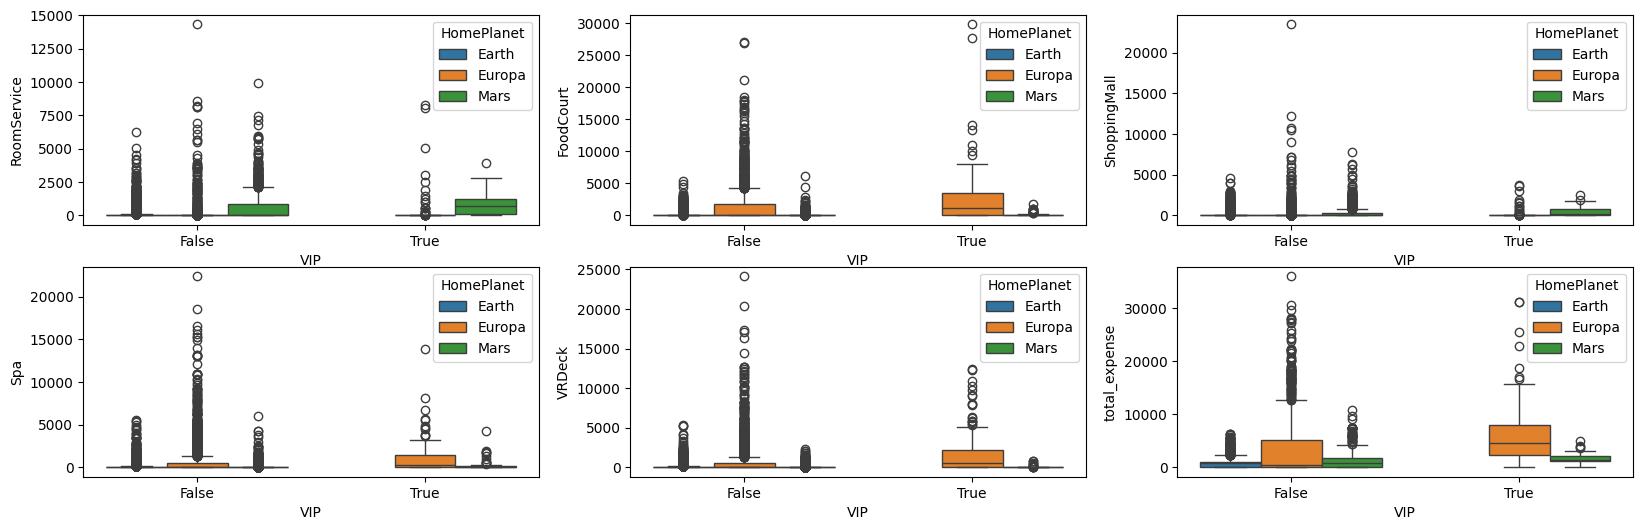

In [25]:
fig,axis = plt.subplots(2,3,figsize=(20,6))
axi={'RoomService':axis[0,0],'FoodCourt':axis[0,1],'ShoppingMall':axis[0,2],'Spa':axis[1,0],'VRDeck':axis[1,1],'total_expense':axis[1,2]}
for i in (['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','total_expense']):
    sns.boxplot(y=train_data2[i],x=train_data2['VIP'],hue=train_data2['HomePlanet'],ax=axi[i])


### Check expenses by passengers from Earth

<Axes: >

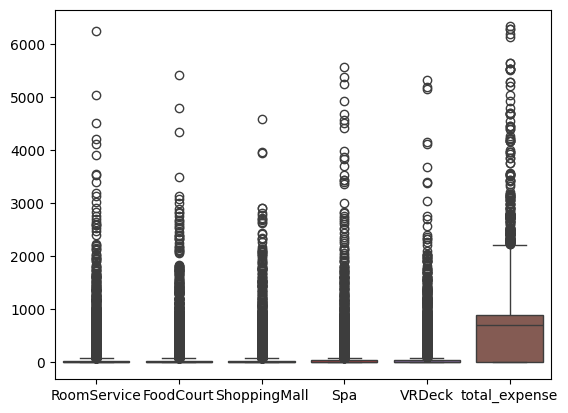

In [26]:
sns.boxplot(train_data2[train_data2['HomePlanet']=='Earth'][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','total_expense']])

<Axes: xlabel='VIP', ylabel='HomePlanet'>

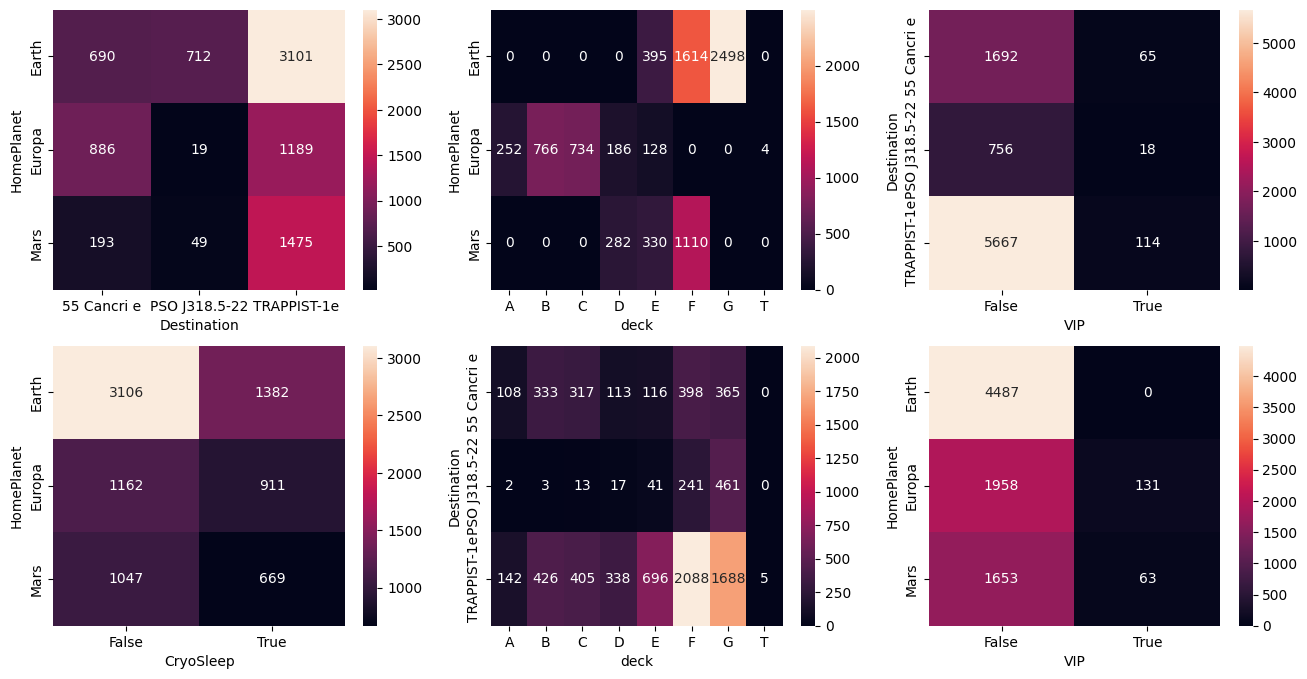

In [27]:
fig,axis = plt.subplots(2,3,figsize=(16,8))
sns.heatmap(pd.crosstab(train_data2['HomePlanet'],train_data2['Destination']),annot=True,fmt='.0f',ax=axis[0,0])
sns.heatmap(pd.crosstab(train_data2['HomePlanet'],train_data2['deck']),annot=True,fmt='.0f',ax=axis[0,1])
sns.heatmap(pd.crosstab(train_data2['Destination'],train_data2['VIP']),annot=True,fmt='.0f',ax=axis[0,2])
sns.heatmap(pd.crosstab(train_data2['HomePlanet'],train_data2['CryoSleep']),annot=True,fmt='.0f',ax=axis[1,0])
sns.heatmap(pd.crosstab(train_data2['Destination'],train_data2['deck']),annot=True,fmt='.0f',ax=axis[1,1])
sns.heatmap(pd.crosstab(train_data2['HomePlanet'],train_data2['VIP']),annot=True,fmt='.0f',ax=axis[1,2])

In [28]:
sample

NameError: name 'sample' is not defined

<Axes: xlabel='Destination', ylabel='HomePlanet'>

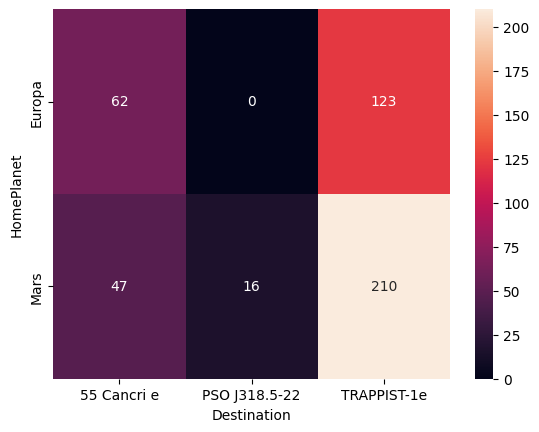

In [ ]:
sns.heatmap(pd.crosstab(sample['HomePlanet'],sample['Destination']),annot=True,fmt='.0f')

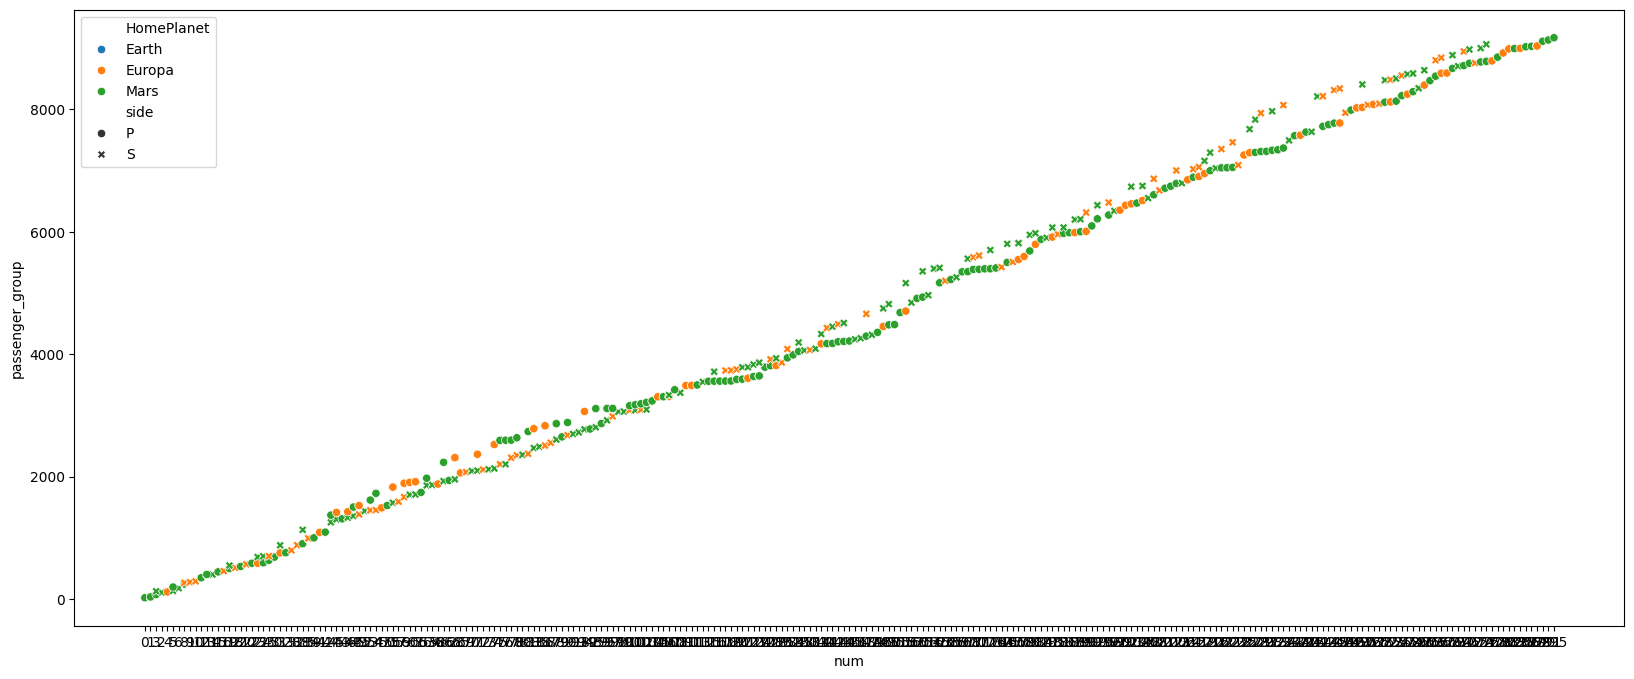

In [ ]:
sample = train_data2[train_data2['deck']=='D']
fig = plt.figure(figsize=(20,8))
sns.scatterplot(y=sample['passenger_group'].astype(int),x=sample['num'],hue=sample['HomePlanet'],style=sample['side'])
plt.show()

### Checking missing homeplanet values

In [ ]:
train_data2[pd.isnull(train_data2['HomePlanet'])]['deck'].value_counts()

deck
F    70
G    61
E    23
C    13
B    13
D    10
A     4
T     1
Name: count, dtype: int64

In [ ]:
sns.scatterplot(y=train_data2[train_data2['total_expense']!=0]['RoomService'],x=train_data2['total_expense'],hue = train_data2['VIP'],ax=axis[0,0])
plt.show()

In [ ]:
train_data2.sample(10)

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
6400     6761_01       Mars      True  F/1405/P  TRAPPIST-1e  18.0  False   
1703     1810_01       Mars     False   F/356/P  TRAPPIST-1e  56.0  False   
3857     4132_01      Earth      True   G/678/P  55 Cancri e  18.0  False   
6364     6730_01      Earth     False  G/1096/S  TRAPPIST-1e  14.0  False   
6558     6921_02     Europa      True   C/255/S  55 Cancri e  24.0  False   
3128     3377_01       Mars      True   F/638/S  TRAPPIST-1e  33.0  False   
5316     5684_01        NaN      True   B/218/S  TRAPPIST-1e  33.0  False   
6429     6787_03      Earth     False  F/1411/P  TRAPPIST-1e  17.0  False   
3175     3423_01      Earth      True   G/561/P  TRAPPIST-1e  21.0    NaN   
7666     8178_01      Earth      True  G/1318/S  TRAPPIST-1e  18.0  False   

      RoomService  FoodCourt  ShoppingMall  ...  passenger_group  \
6400          0.0        0.0           0.0  ...             6761   
1703       4694.0        0.0        2661.0  ...             1810   
3857          0.0        0.0           0.0  ...             4132   
6364          0.0        6.0         791.0  ...             6730   
6558          0.0        0.0           0.0  ...             6921   
3128          0.0        0.0           0.0  ...             3377   
5316          0.0        0.0           0.0  ...             5684   
6429        108.0        4.0        1898.0  ...             6787   
3175          0.0        0.0           0.0  ...             3423   
7666          0.0        0.0           0.0  ...             8178   

      passenger_num deck   num side  First Name    Last Name total_passenger  \
6400              1    F  1405    P        Nute        Curte               2   
1703              1    F   356    P        Whee        Ruité               1   
3857              1    G   678    P      Curtle        Norry               1   
6364              1    G  1096    S        Dell  Kerristicey               1   
6558              2    C   255    S      Eleron   Fordulgaug               6   
3128              1    F   638    S         Ran        Merie               1   
5316              1    B   218    S     Zaninon       Busive               4   
6429              3    F  1411    P      Therta   Hurchanney               7   
3175              1    G   561    P       Heald      Johnsby               1   
7666              1    G  1318    S         Sha    Weavesend               1   

     total_expense with_family  
6400           0.0           0  
1703        7406.0           0  
3857           0.0           0  
6364         846.0           0  
6558           0.0           1  
3128           0.0           0  
5316           0.0           1  
6429        2023.0           0  
3175           0.0           0  
7666           0.0           0  

[10 rows x 24 columns]

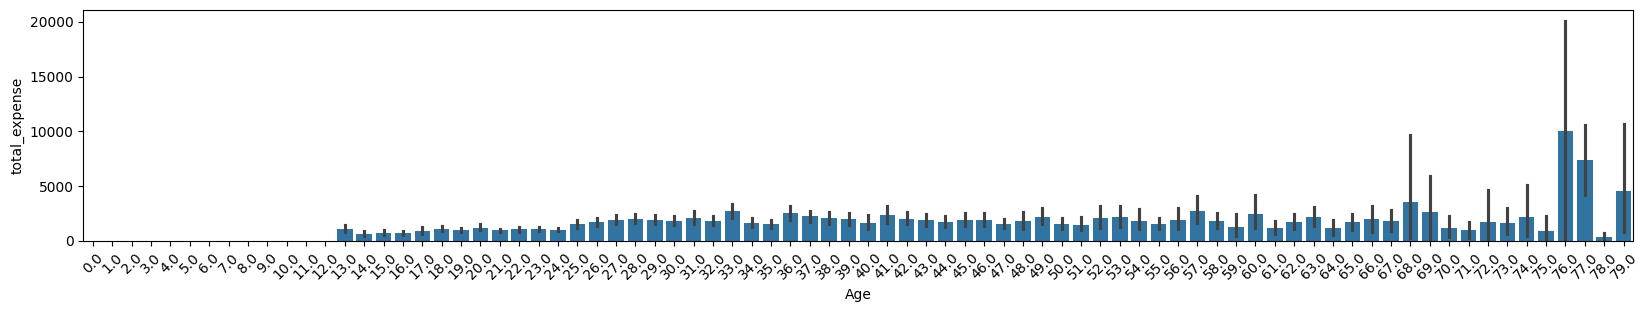

In [ ]:
fig = plt.figure(figsize=(20,3))
sns.barplot(x=train_data2['Age'],y=train_data2['total_expense'])
plt.xticks(rotation = 45)
plt.show()

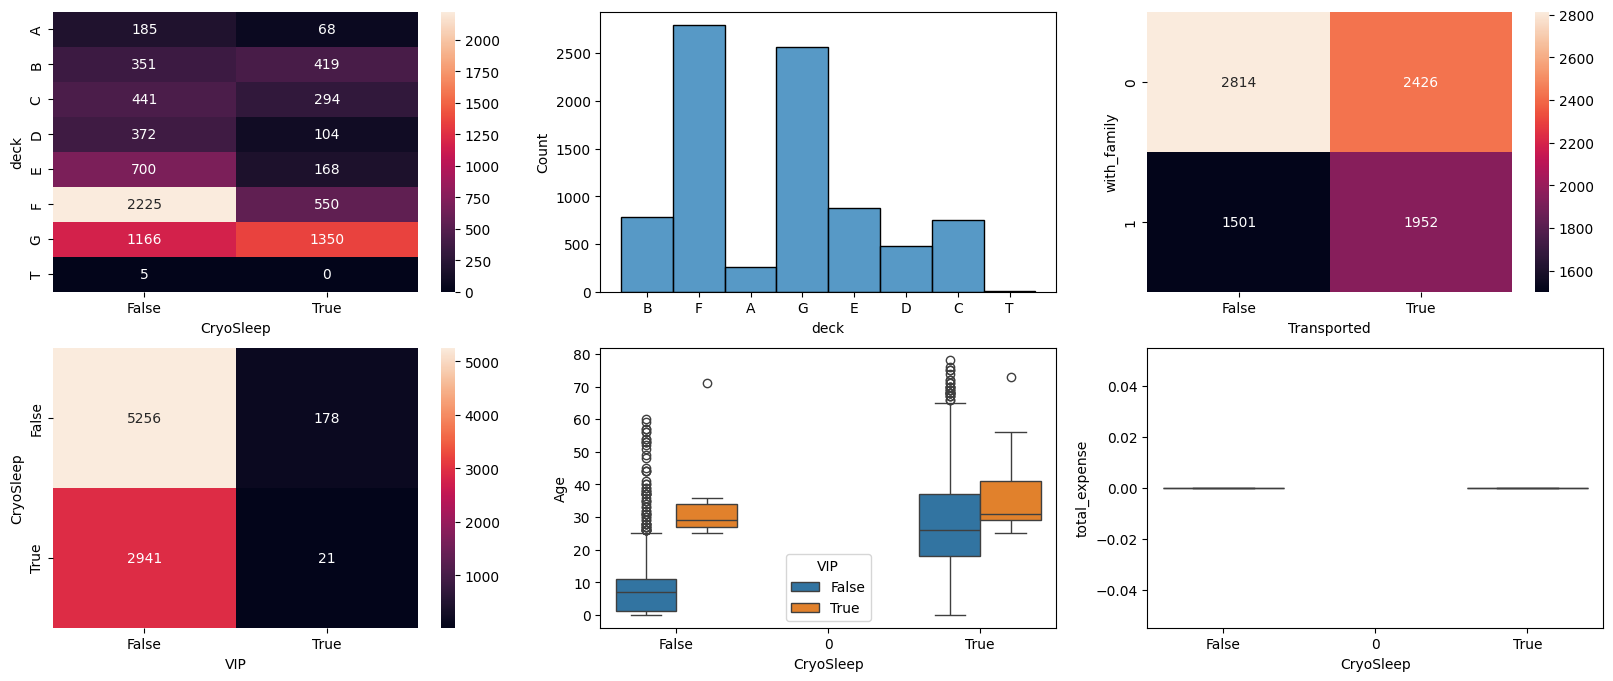

In [ ]:
fig,axis = plt.subplots(2,3,figsize=(20,8))
sns.heatmap(pd.crosstab(train_data2['deck'],train_data2['CryoSleep']),annot=True,fmt='.0f',ax=axis[0,0])
sns.histplot(train_data2['deck'],ax=axis[0,1])
sns.heatmap(pd.crosstab(train_data2['with_family'],train_data2['Transported']),annot=True,fmt='.0f',ax=axis[0,2])
sns.heatmap(pd.crosstab(train_data2['CryoSleep'],train_data2['VIP']),annot=True,fmt='.0f',ax=axis[1,0])
sns.boxplot(y=train_data2['Age'],x=train_data2['CryoSleep'],hue = train_data2['VIP'],ax=axis[1,1])
sns.boxplot(y=train_data2['total_expense'],x=train_data2['CryoSleep'])
plt.show()

In [29]:
train_data2.loc[((train_data2['CryoSleep']==1)|(train_data2['Age']<13)),['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0
train_data2.loc[train_data2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].abs().sum(axis=1)>0,'CryoSleep']=0

In [30]:
train_data2.groupby('VIP')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].agg([np.mean,min,max])

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\226787317.py:1: FutureWarning: The provided callable <function mean at 0x000001A2C73E9B20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_data2.groupby('VIP')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].agg([np.mean,min,max])
C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\226787317.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  train_data2.groupby('VIP')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].agg([np.mean,min,max])
C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\226787317.py:1: FutureWarning: The provided callable <built-in function max> is curre

RoomService                  FoodCourt               ShoppingMall       \
             mean  min      max         mean  min      max         mean  min   
VIP                                                                            
False  215.308913  0.0  14327.0   422.485352  0.0  27071.0   171.669961  0.0   
True   473.615385  0.0   8243.0  1802.056701  0.0  29813.0   247.726804  0.0   

                       Spa                     VRDeck                
           max        mean  min      max         mean  min      max  
VIP                                                                  
False  23492.0  299.239516  0.0  22408.0   279.989984  0.0  24133.0  
True    3700.0  756.868687  0.0  13902.0  1228.556122  0.0  12424.0

In [31]:
train_data2.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'passenger_group', 'passenger_num', 'deck',
       'num', 'side', 'First Name', 'Last Name', 'total_passenger',
       'total_expense', 'with_family'],
      dtype='object')

In [32]:
train_data2[pd.isnull(train_data2['VIP'])&(train_data2['HomePlanet']!='Earth')]

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age  VIP  \
145      0165_01       Mars      True    F/37/P  TRAPPIST-1e  35.0  NaN   
228      0244_02       Mars      True    F/47/S  55 Cancri e  14.0  NaN   
566      0593_01       Mars         0    D/24/P  TRAPPIST-1e   NaN  NaN   
582      0607_01     Europa         0    C/22/P  TRAPPIST-1e  37.0  NaN   
596      0619_01     Europa      True    C/24/S  TRAPPIST-1e  39.0  NaN   
...          ...        ...       ...       ...          ...   ...  ...   
8365     8945_02     Europa         0   D/270/S  TRAPPIST-1e  21.0  NaN   
8367     8948_01     Europa         0   B/342/S  TRAPPIST-1e  57.0  NaN   
8430     9006_01     Europa      True   B/343/S  TRAPPIST-1e  33.0  NaN   
8630     9205_03     Europa      True   B/300/P  TRAPPIST-1e  52.0  NaN   
8666     9248_01        NaN         0  F/1792/S  55 Cancri e  38.0  NaN   

      RoomService  FoodCourt  ShoppingMall  ...  passenger_group  \
145           0.0        0.0           0.0  ...             0165   
228           0.0        0.0           0.0  ...             0244   
566          43.0      152.0         182.0  ...             0593   
582          27.0      654.0          10.0  ...             0607   
596           0.0        0.0           0.0  ...             0619   
...           ...        ...           ...  ...              ...   
8365       3036.0       32.0           0.0  ...             8945   
8367          0.0       13.0           0.0  ...             8948   
8430          0.0        0.0           0.0  ...             9006   
8630          0.0        0.0           0.0  ...             9205   
8666         28.0     1208.0         973.0  ...             9248   

      passenger_num deck   num side  First Name   Last Name total_passenger  \
145               1    F    37    P      Graven       Anche               1   
228               2    F    47    S        Tous         Sad               2   
566               1    D    24    P         Hon         Kra               1   
582               1    C    22    P     Dyonium   Hontichre               3   
596               1    C    24    S     Scellus  Holatirint               2   
...             ...  ...   ...  ...         ...         ...             ...   
8365              2    D   270    S     Zinonon    Cralinal               2   
8367              1    B   342    S     Sterfik  Hetforhaft               2   
8430              1    B   343    S      Shaiam  Tinganking               1   
8630              3    B   300    P     Propent     Brakeng               3   
8666              1    F  1792    S        Gian       Perle               1   

     total_expense with_family  
145            0.0           0  
228            0.0           1  
566         2383.0           0  
582        11140.0           1  
596            0.0           1  
...            ...         ...  
8365        3486.0           1  
8367       11390.0           1  
8430           0.0           0  
8630           0.0           1  
8666        2416.0           0  

[88 rows x 24 columns]

In [33]:
train_data3=train_data2.copy()


In [34]:
train_data3[['VIP','Age','with_family','Transported']].corr()

VIP       Age  with_family  Transported
VIP          1.000000  0.092819     0.026988    -0.037650
Age          0.092819  1.000000    -0.121535    -0.075026
with_family  0.026988 -0.121535     1.000000     0.100146
Transported -0.037650 -0.075026     0.100146     1.000000

In [35]:
train_data2.loc[(train_data2['deck'].isin(['A','B','C','T'])&(pd.isnull(train_data2['HomePlanet']))),'HomePlanet']='Europa'
train_data2.loc[(train_data2['deck'].isin(['G'])&(pd.isnull(train_data2['HomePlanet']))),'HomePlanet']='Earth'

In [36]:
(train_data2.isna().sum())/len(train_data2)*100


PassengerId        0.000000
HomePlanet         1.253882
CryoSleep          1.127344
Cabin              2.289198
Destination        2.093639
Age                2.059128
VIP                2.335212
RoomService        1.230875
FoodCourt          1.219372
ShoppingMall       1.184861
Spa                1.311400
VRDeck             1.230875
Name               2.300702
Transported        0.000000
passenger_group    0.000000
passenger_num      0.000000
deck               2.289198
num                2.289198
side               2.289198
First Name         2.300702
Last Name          2.300702
total_passenger    0.000000
total_expense      0.000000
with_family        0.000000
dtype: float64

In [37]:
(train_data_orig.isna().sum()/len(train_data))*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [39]:
class CryoSleepAdjust(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        X.loc[((X['CryoSleep']==True)|(X['Age']<13)),['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0
        X.loc[X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].abs().sum(axis=1)>0,'CryoSleep']=False
        return X

In [40]:
class CreateCabinVars(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        X['deck'] = X.Cabin.apply(lambda x: x.split("/")[0] if pd.notnull(x) else np.nan)
        X['side'] = X.Cabin.apply(lambda x: x.split("/")[2] if pd.notnull(x) else np.nan)
        return X

In [41]:
class PassengerVars(BaseEstimator,TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        X[['PassengerGroup','PassengerNum']]=X['PassengerId'].apply(lambda x: pd.Series(x.split("_")))
        X['PassengerNum']=X['PassengerNum'].astype('int')
        max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})
        X_final = pd.merge(X,max_pass,on=['PassengerGroup'],how='left')
        return X_final

In [42]:
class TargetEncode(BaseEstimator,TransformerMixin):

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y):
        return y*1


In [43]:
class HomePlanetImpute(BaseEstimator,TransformerMixin):

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_df= pd.DataFrame(X)
        #Imputing Home planet basis deck
        X_df.loc[(X_df[0].isin(['A','B','C','T'])&(pd.isnull(X_df[1]))),1]='Europa'
        X_df.loc[(X_df[0].isin(['G'])&(pd.isnull(X_df[1]))),1]='Earth'

        #Imputing Homeplanet where deck is D and destination is PSO J318.5-22 with Mars

        X_df.loc[((X_df[0]=='D')&(X_df[4]=='PSO J318.5-22')&(pd.isnull(X_df[1]))),1]='Mars'

        #Imputing VIP wherever homeplanet is earth
        X_df.loc[((X_df[1]=='Earth')&pd.isnull(X_df[3])),3]=False

        #Imputing homeplanet for VIPs in deck F by Mars
        X_df.loc[((X_df[3]==True)&(X_df[0]=='F')&(pd.isnull(X_df[1]))),1]='Mars'

        #Imputing Homeplante basis group
        group_loc_map=X_df.groupby([2])[1].first().to_dict()
        X_df[1] = X_df.apply(lambda x: group_loc_map[x[2]] if pd.isnull(x[1])&(x[2] in group_loc_map.keys()) else x[1],1)


        return X_df

In [44]:
from sklearn.compose import make_column_transformer

In [45]:
custom_trf = make_column_transformer(
    (CryoSleepAdjust(),['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age'])
    ,(CreateCabinVars(),['Cabin'])
    ,(PassengerVars(),['PassengerId'])
    ,remainder='passthrough'
)

In [46]:
homeplanet_impute = make_column_transformer(
    (HomePlanetImpute(),[8,14,11,16,15]),remainder='passthrough'
)

In [47]:
simple_impute = make_column_transformer(
    (SimpleImputer(strategy='mean'),[6,7,8,9,10,11]),
    (SimpleImputer(strategy='most_frequent'),[0,1,3,4,5,13,16]),
    remainder='passthrough'
)

In [48]:
ohe_trf = make_column_transformer(
    (OneHotEncoder(drop='first',sparse_output=False),[6,7,8,9,10,11])
    ,('drop',[13,14,15,17])
    ,remainder='passthrough'
)

In [55]:
lab_enc = make_column_transformer(
    (TargetEncode(),list(range(24))),
    remainder='passthrough'
)

In [50]:
rf_mod = RandomForestClassifier()

In [67]:
pipe=Pipeline([('custom_trf',custom_trf),('homeplanet_impute',homeplanet_impute),('simple_impute',simple_impute),('ohe_trf',ohe_trf),('rf_mod',rf_mod)])

In [60]:
pipe=Pipeline([('custom_trf',custom_trf),('homeplanet_impute',homeplanet_impute),('simple_impute',simple_impute),('ohe_trf',ohe_trf),('lab_enc',lab_enc)])

In [68]:
pipe.fit(train_data_orig.drop(columns=['Transported']),train_data_orig['Transported']*1)

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


Pipeline(steps=[('custom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cryosleepadjust',
                                                  CryoSleepAdjust(),
                                                  ['CryoSleep', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck', 'Age']),
                                                 ('createcabinvars',
                                                  CreateCabinVars(),
                                                  ['Cabin']),
                                                 ('passengervars',
                                                  PassengerVars(),
                                                  ['PassengerId'])])),
                ('homeplanet_impute',
                 ColumnTransformer(remainder=...
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(),
                                                  [6, 7, 8, 9, 10, 11]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 5, 13, 16])])),
                ('ohe_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [6, 7, 8, 9, 10, 11]),
                                                 ('drop', 'drop',
                                                  [13, 14, 15, 17])])),
                ('rf_mod', RandomForestClassifier())])

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
params={
    'rf_mod__max_depth':range(3,10),
    'rf_mod__min_samples_leaf':[1,0.01,0.05,0.1],
    'rf_mod__min_samples_split':[2,0.01,0.05,0.1]
}

In [72]:
rscv = RandomizedSearchCV(pipe,param_distributions=params,n_jobs=-1,cv=5)
rscv.fit(train_data_orig.drop(columns=['Transported']),train_data_orig['Transported']*1)

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('custom_trf',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cryosleepadjust',
                                                                               CryoSleepAdjust(),
                                                                               ['CryoSleep',
                                                                                'RoomService',
                                                                                'FoodCourt',
                                                                                'ShoppingMall',
                                                                                'Spa',
                                                                                'VRDeck',
                                                                                'Age']),
                                                                              ('createcabinvars',
                                                                               CreateCabinVars(),
                                                                               ['Cabin']),
                                                                              ('passengervars',
                                                                               PassengerVars(),
                                                                               ['PassengerId'])])),
                                             ('homeplanet_im...
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               [6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11]),
                                                                              ('drop',
                                                                               'drop',
                                                                               [13,
                                                                                14,
                                                                                15,
                                                                                17])])),
                                             ('rf_mod',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf_mod__max_depth': range(3, 10),
                                        'rf_mod__min_samples_leaf': [1, 0.01,
                                                                     0.05,
                                                                     0.1],
                                        'rf_mod__min_samples_split': [2, 0.01,
                                                                      0.05,
                                                                      0.1]})

In [73]:
y_pred=rscv.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
rscv.best_estimator_

In [58]:
check=pd.DataFrame(pipe.transform(train_data_orig))
check

C:\Users\data science den\AppData\Local\Temp\ipykernel_41016\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


0    1    2    3    4    5    6    7    8    9   ...   14     15  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0    0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  109.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0   43.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0    0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  303.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
8688  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0    0.0   
8689  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0    0.0   
8690  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0    0.0   
8691  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0    0.0   
8692  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  126.0   

          16      17      18      19    20 21 22 23  
0        0.0     0.0     0.0     0.0  39.0  1  1  0  
1        9.0    25.0   549.0    44.0  24.0  1  1  1  
2     3576.0     0.0  6715.0    49.0  58.0  2  1  0  
3     1283.0   371.0  3329.0   193.0  33.0  2  2  0  
4       70.0   151.0   565.0     2.0  16.0  1  1  1  
...      ...     ...     ...     ...   ... .. .. ..  
8688  6819.0     0.0  1643.0    74.0  41.0  1  1  0  
8689     0.0     0.0     0.0     0.0  18.0  1  1  0  
8690     0.0  1872.0     1.0     0.0  26.0  1  1  1  
8691  1049.0     0.0   353.0  3235.0  32.0  2  1  0  
8692  4688.0     0.0     0.0    12.0  44.0  2  2  1  

[8693 rows x 24 columns]

In [178]:
check=pd.DataFrame(pipe.transform(train_data_orig))
check

C:\Users\data science den\AppData\Local\Temp\ipykernel_4332\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


0       1       2       3       4     5  6       7      8   \
0       0.0     0.0     0.0     0.0     0.0  39.0  B  Europa  False   
1     109.0     9.0    25.0   549.0    44.0  24.0  F   Earth  False   
2      43.0  3576.0     0.0  6715.0    49.0  58.0  A  Europa   True   
3       0.0  1283.0   371.0  3329.0   193.0  33.0  A  Europa  False   
4     303.0    70.0   151.0   565.0     2.0  16.0  F   Earth  False   
...     ...     ...     ...     ...     ...   ... ..     ...    ...   
8688    0.0  6819.0     0.0  1643.0    74.0  41.0  A  Europa   True   
8689    0.0     0.0     0.0     0.0     0.0  18.0  G   Earth  False   
8690    0.0     0.0  1872.0     1.0     0.0  26.0  G   Earth  False   
8691    0.0  1049.0     0.0   353.0  3235.0  32.0  E  Europa  False   
8692  126.0  4688.0     0.0     0.0    12.0  44.0  E  Europa  False   

                 9      10 11 12    13        14       15 16  \
0       TRAPPIST-1e  False  P  1  0001     B/0/P  0001_01  1   
1       TRAPPIST-1e  False  S  1  0002     F/0/S  0002_01  1   
2       TRAPPIST-1e  False  S  2  0003     A/0/S  0003_01  1   
3       TRAPPIST-1e  False  S  2  0003     A/0/S  0003_02  2   
4       TRAPPIST-1e  False  S  1  0004     F/1/S  0004_01  1   
...             ...    ... .. ..   ...       ...      ... ..   
8688    55 Cancri e  False  P  1  9276    A/98/P  9276_01  1   
8689  PSO J318.5-22   True  S  1  9278  G/1499/S  9278_01  1   
8690    TRAPPIST-1e  False  S  1  9279  G/1500/S  9279_01  1   
8691    55 Cancri e  False  S  2  9280   E/608/S  9280_01  1   
8692    TRAPPIST-1e  False  S  2  9280   E/608/S  9280_02  2   

                     17     18  
0       Maham Ofracculy  False  
1          Juanna Vines   True  
2         Altark Susent  False  
3          Solam Susent  False  
4     Willy Santantines   True  
...                 ...    ...  
8688  Gravior Noxnuther  False  
8689    Kurta Mondalley  False  
8690       Fayey Connon   True  
8691   Celeon Hontichre  False  
8692   Propsh Hontichre   True  

[8693 rows x 19 columns]

In [163]:
check[(check[0]=='D')&pd.isnull(check[1])]

0     1     2      3            4      5       6      7     8       9   \
186   D  None  0210  False  55 Cancri e   True     0.0    0.0   0.0     0.0   
365   D  None  0402   True  55 Cancri e   True     0.0    0.0   0.0     0.0   
2274  D  None  2443  False  TRAPPIST-1e  False  1458.0  421.0  76.0     0.0   
7218  D  None  7711  False  TRAPPIST-1e  False     0.0   82.0   0.0  1624.0   

        10    11       12 13       14 15 16                 17     18  
186    0.0  24.0    D/6/P  P  0210_01  1  1     Arraid Inicont   True  
365    0.0  32.0   D/15/S  S  0402_01  1  1       Teron Sageng   True  
2274   0.0  31.0   D/72/P  P  2443_01  1  1                NaN  False  
7218  77.0  24.0  D/241/P  P  7711_01  1  1  Jihoton Muspereed  False

In [165]:
check[check[2].isin(['0210','0402','2443','7711'])]

0     1     2      3            4      5       6      7     8       9   \
186   D  None  0210  False  55 Cancri e   True     0.0    0.0   0.0     0.0   
365   D  None  0402   True  55 Cancri e   True     0.0    0.0   0.0     0.0   
2274  D  None  2443  False  TRAPPIST-1e  False  1458.0  421.0  76.0     0.0   
7218  D  None  7711  False  TRAPPIST-1e  False     0.0   82.0   0.0  1624.0   

        10    11       12 13       14 15 16                 17     18  
186    0.0  24.0    D/6/P  P  0210_01  1  1     Arraid Inicont   True  
365    0.0  32.0   D/15/S  S  0402_01  1  1       Teron Sageng   True  
2274   0.0  31.0   D/72/P  P  2443_01  1  1                NaN  False  
7218  77.0  24.0  D/241/P  P  7711_01  1  1  Jihoton Muspereed  False

In [161]:
check.groupby(0)[1].apply(lambda X: X.value_counts(dropna=False))

0        
A  Europa     256
B  Europa     779
C  Europa     747
D  Mars       285
   Europa     189
   NaN          4
E  Earth      400
   Mars       335
   Europa     130
   NaN         11
F  Earth     1620
   Mars      1132
   NaN         42
G  Earth     2559
T  Europa       5
Name: 1, dtype: int64

In [97]:
transform_check=pd.merge(train_data_orig,check[[12,1]].rename(columns={12:'PassengerId'}),on='PassengerId',how='left').to_csv('transform_check.csv')
#transform_check[transform_check.HomePlanet!=transform_check[1]].to_csv('transform_check.csv')

In [199]:
(pd.DataFrame(pipe.transform(train_data_orig)).isna().sum())/8693

C:\Users\data science den\AppData\Local\Temp\ipykernel_4332\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
dtype: float64

In [72]:
(pd.DataFrame(pipe.transform(train_data_orig)).isna().sum())/8693

C:\Users\data science den\AppData\Local\Temp\ipykernel_4332\321764025.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_pass = X.groupby(['PassengerGroup'])['PassengerNum'].agg(max).reset_index().rename(columns={'PassengerNum':'totalPassenger'})


0     0.011273
1     0.012309
2     0.012194
3     0.011849
4     0.013114
5     0.012309
6     0.020591
7     0.022892
8     0.022892
9     0.022892
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.023122
15    0.020936
16    0.023352
17    0.023007
18    0.000000
dtype: float64

In [447]:
train_data_orig.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')